# Random Forest - Ensemble Method

In [19]:
#importing packages and cleaning data
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Churn_Final_datasett.csv')

data = data.drop(['customerID', 'Partner', 'StreamingTV', 'StreamingMovies','contact'], axis= 1)
data.MultipleLines = [(str(x).split(' ')[0]) for x in list(data.MultipleLines)]
data.OnlineSecurity = [(str(x).split(' ')[0]) for x in list(data.OnlineSecurity)]
data.OnlineBackup = [(str(x).split(' ')[0]) for x in list(data.OnlineBackup)]
data.DeviceProtection = [(str(x).split(' ')[0]) for x in list(data.DeviceProtection)]
data.TechSupport = [(str(x).split(' ')[0]) for x in list(data.TechSupport)]

#Converting Coverting data to Numerical 
categorical_data = data.iloc[:, [0,2,4,5,6,7,8,9,10,11,12]].values
categorical_data = pd.DataFrame(categorical_data)
X_dict = categorical_data.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
dv_X = DictVectorizer(sparse=False)
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)
# show X_encoded
X_encoded = pd.DataFrame(X_encoded)
X_encoded = X_encoded.drop([1,3,5,7,8,12,14,15,18,19,23], axis= 1)
#Renaming 
X_encoded.rename(columns={0: 'Gender',2:'PaperLess Billing',4: 'Dependents', 6: 'Phone Services', 9: 'MultipleLines',10:'DSL',11:'Fiber Optic',13:'OnlineSecurity',16:'OnlineBackup',17:'DeviceProtection',20:'Tech Support',21:'month-to-month',22:'OneYear'}, inplace=True)
#(0,1->Gender,2,3->PaperLess Billing,4,5->Dependents ,6,7->Phone Services,8,9->MultipleLines, 10,11,12->Internet Service,#13,14->Online Security, 15,16->Online Backup,17,18-> DeviceProtection,19,20-> Tech Support,21,22,23->Contract  )

#Converting Other Categorical to Numerical
categorical_data_2 = data.iloc[:, [13,16,20,21,22,23]].values
categorical_data_2 = pd.DataFrame(categorical_data_2)
X_dict1 = categorical_data_2.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
dv_X1 = DictVectorizer(sparse=False)
# apply dv_X on X_dict
X_encoded_2 = dv_X1.fit_transform(X_dict1)
# show X_encoded
X_encoded_2 = pd.DataFrame(X_encoded_2)
X_encoded_2 = X_encoded_2.drop([1,4,11,14,16,17], axis= 1)
X_encoded_2.rename(columns={0: 'BankTransfer',2:'ElectronicCheck',3: 'MailedCheck',5:'Germany', 6: 'Spain',7:'Admin',8:'Blue-Collar',9: 'Business',10:'Management',12:'Primary',13:'secondary',15:'Housing',18:'Loan'}, inplace=True)
#(0,1,2,3->Electronic Check, 4,5,6 ->Country,7,8,9,10,11->Job ,12,13,14 ->Tertiary,15,16->Housing,17,18->Loan  )

#Extracting Numerical Data
numerical_data = data.iloc[:, [1,3,14,15,17,18,19,24]].values
numerical_data = pd.DataFrame(numerical_data)
numerical_data.rename(columns={0: 'SeniorCitizen',1:'tenure',2: 'Monthly Charges', 3: 'TotalCharges', 4: 'CreditScore',5:'NumOfProducts',6:'Has Card',7:'IsActive'}, inplace=True)

#Concatenating all the converted Numerical Data 
df = pd.concat([X_encoded, X_encoded_2], axis = 1)
#Concatenating all the data together
datas = pd.concat([df, numerical_data], axis=1)

#Converting Object type to Float
datas['SeniorCitizen'] = datas['SeniorCitizen'].astype(float)
datas['tenure'] = datas['tenure'].astype(float)
datas['Monthly Charges'] = datas['Monthly Charges'].astype(float)
#datas['TotalCharges'] = datas['TotalCharges'].astype(float)
datas['CreditScore'] = datas['CreditScore'].astype(float)
datas['NumOfProducts'] = datas['NumOfProducts'].astype(float)
datas['Has Card'] = datas['Has Card'].astype(float)
datas['IsActive'] = datas['IsActive'].astype(float)
#Removing Total Charges
datas = datas.drop(['TotalCharges'], axis= 1)


from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = data.iloc[:, -1].values
y = pd.DataFrame(y)
y[0] = labelencoder_y.fit_transform(y[0])


In [4]:
#splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datas, y, test_size=0.2, random_state=0)  

In [15]:
#running Random Forest 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=180, random_state=0)  
clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)  

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [16]:
#obtaining confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  
print(mean_squared_error(y_test,y_pred))

[[942  99]
 [189 179]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.64      0.49      0.55       368

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

0.7955997161107168
0.2044002838892832


## OOB Errors for Random Forests

https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py

In [11]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [12]:
RANDOM_STATE = 123

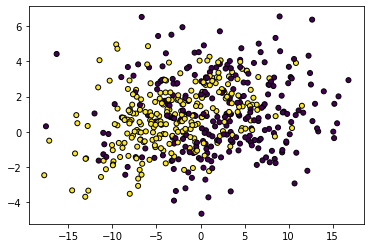

In [13]:
# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=20,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [14]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features="sqrt",
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

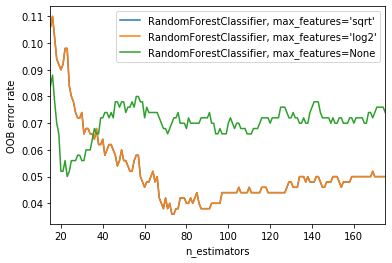

In [15]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
    
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()